In [10]:
# Importing all the needed packages for data visualization and exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



player_stats = pd.read_csv('Seasons_Stats.csv')

Mean Absolute Error: 0.9833770492191686
Mean Squared Error: 2.191322241257698
R-squared: 0.7743839098746353


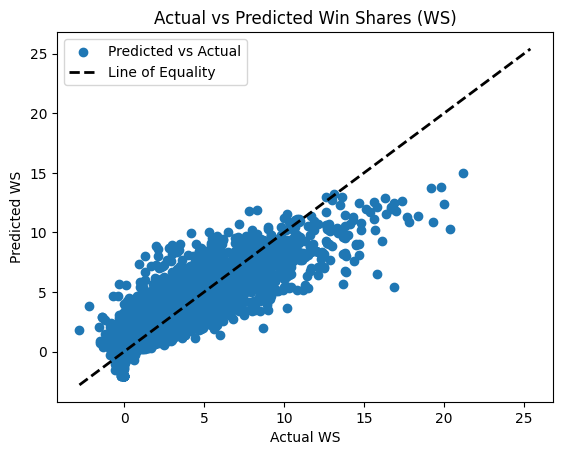

In [15]:

features = ['PTS', 'FG%', 'TS%']
target = 'WS'

player_stats = player_stats.dropna(subset=features + [target])

# Split the data and prepare it for the model
X = player_stats[features]
y = player_stats[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and train it with the wanted features
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Create scatterplot
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.xlabel('Actual WS')
plt.ylabel('Predicted WS')
plt.title('Actual vs Predicted Win Shares (WS)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Line of Equality')  # Line of equality
plt.legend()
plt.show()